# Data Mining Week 9 Class Practice
# Rayna Shera Chang / 0706022310022

## Import Library

In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [111]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [112]:
df = df.rename(columns={"Tingkat/Lantai ": "Tingkat/Lantai", "Harga Penawaran (dari Owner)": "Harga Penawaran"})
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [113]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


From the descriptive statistics table, the dataset contains 308 property listings with variables related to land size, building size, number of rooms, bathrooms, floors, and owner-offered prices. The data shows substantial variation — for example, land area ranges widely from 14 m² to 1,561 m² (mean ≈ 227 m²), and building area from 14 m² to 1,200 m² (mean ≈ 267 m²), indicating the dataset includes both small and large properties. The number of bedrooms and bathrooms averages around 4 and 3, respectively, suggesting most homes are medium-sized family residences. Meanwhile, the “Harga Penawaran” (offered price) shows extreme dispersion, with a mean of about 5.01 billion IDR but a maximum of 99 billion IDR, implying potential outliers or luxury properties. The high standard deviations across most variables suggest a skewed distribution, emphasizing the need for data normalization or outlier treatment before further modeling.


In [114]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran                308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


From the dataset information, there are 308 entries and 12 columns that describe various aspects of property listings. The dataset is clean, with no missing values across all columns. It consists of six numerical (`int64`) and six categorical (`object`) features. The numerical attributes — such as land area, building area, number of rooms, bathrooms, floors, and offered price — are suitable for quantitative analysis and modeling. Meanwhile, categorical variables like *Area Category*, *Nama Daerah*, *Arah Hadap Rumah*, and *Posisi Rumah* provide qualitative information that could influence property value. The dataset’s balance between numerical and categorical data makes it versatile for both descriptive and predictive analysis, such as price estimation, clustering, or area comparison. Overall, it appears well-structured and ready for preprocessing steps such as encoding categorical data and scaling numerical features.


## Data Preprocessing

In [115]:
df[df.duplicated(keep=False)]

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
13,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
14,Standard,Gubeng,104,215,4,4,2,1350000000,Belum,Timur,Standard,1-2 Mobil
98,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
110,Standard,Sakura Regency Ketintang,134,200,7,2,2,2000000000,Belum,Utara,Standard,> 2 Mobil
257,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil
282,Premium,Citraland,210,325,6,5,2,4250000000,Belum,Selatan,Standard,> 2 Mobil


In [116]:
df = df.drop_duplicates(keep='first')

The first line `df[df.duplicated(keep=False)]` displays all duplicate rows in the dataset, while the second line `df = df.drop_duplicates(keep='first')` removes those duplicates, keeping only the first occurrence of each unique record.

In [117]:
# show unique values from column
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [118]:
df = df.drop('Terjual/Belum', axis=1)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


## Data Visualization

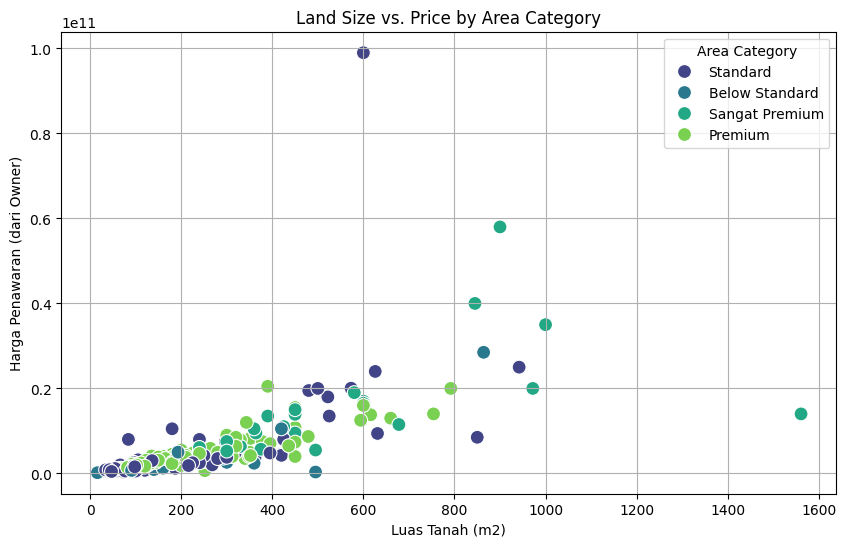

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran', hue='Area Category', palette='viridis', s=100)
plt.title('Land Size vs. Price by Area Category')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between **land size (Luas Tanah)** and **offered price (Harga Penawaran)** across different **area categories**. Overall, there is a clear positive correlation — as land size increases, the property price also tends to rise. Properties in **Premium** and **Sangat Premium** categories (green and teal dots) generally occupy larger land areas and are priced higher than those in **Standard** or **Below Standard** areas (blue tones). However, some overlap exists among categories, suggesting that **location and area classification significantly influence price**, not just land size. A few extreme high-priced points, particularly among premium areas, may indicate the presence of luxury or outlier properties. This visualization highlights that both **land area and neighborhood class** are key factors driving property prices.

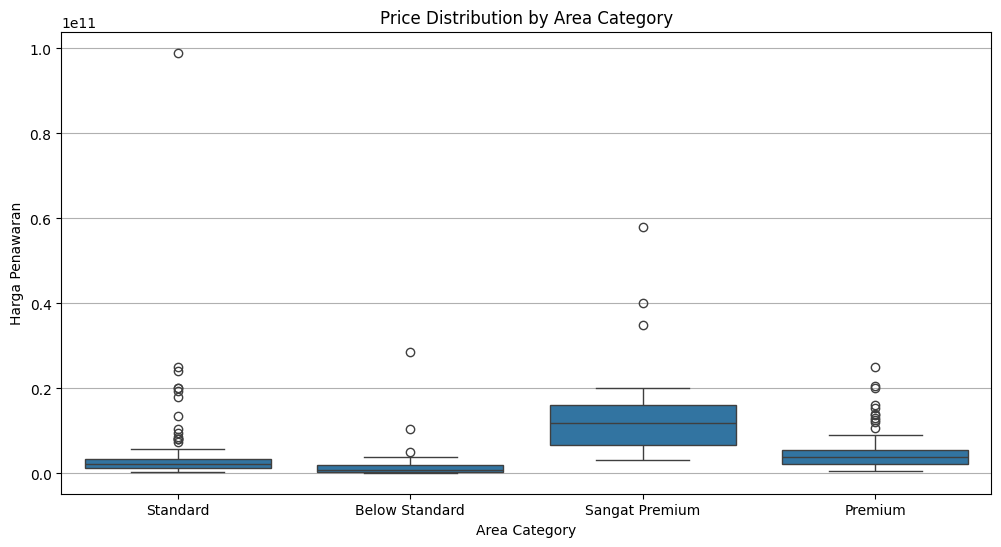

In [120]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Area Category', y='Harga Penawaran')
plt.title('Price Distribution by Area Category')
plt.xlabel('Area Category')
plt.ylabel('Harga Penawaran')
plt.grid(axis='y')
plt.show()

The boxplot illustrates the **price distribution of properties based on area category**, revealing clear differences in value across segments. **Sangat Premium areas** have the highest median and widest price range, indicating these zones host the most expensive and varied properties, likely due to location advantages or luxury features. **Premium areas** follow, with moderately high prices but a narrower spread compared to Sangat Premium, showing more consistent pricing. **Standard** and **Below Standard** areas have significantly lower median prices and smaller interquartile ranges, suggesting more affordable and uniform housing markets. The presence of numerous **outliers** in all categories — especially in Standard and Sangat Premium — implies certain properties are priced far above the norm, potentially representing luxury listings or overvalued units. Overall, the visualization highlights how **area classification strongly correlates with property value**, with higher categories commanding notably higher prices.

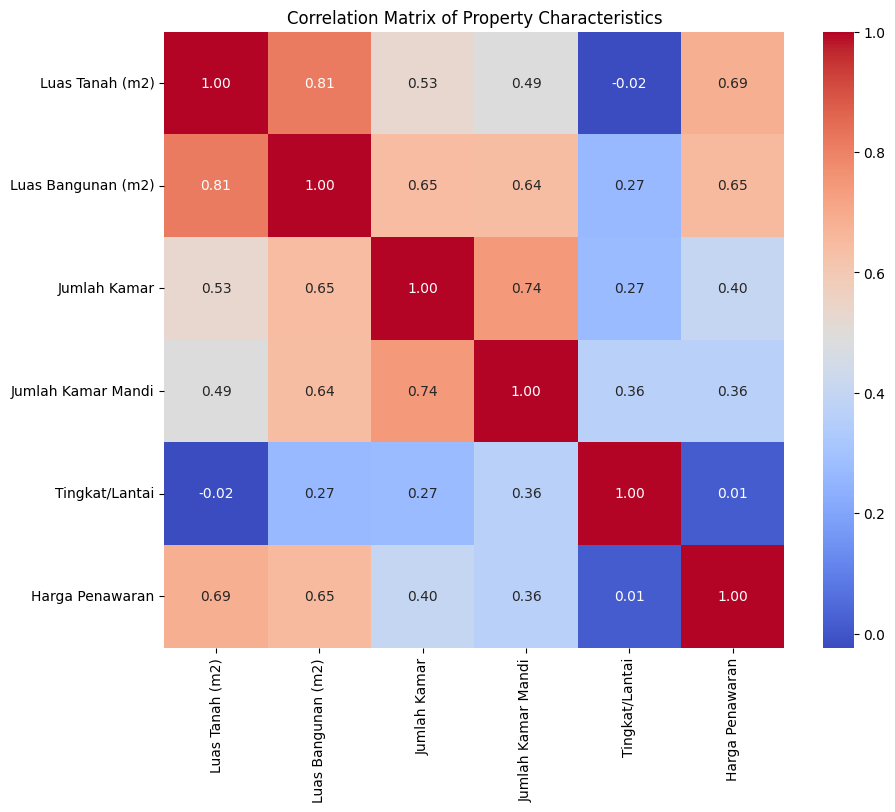

In [121]:
numerical_cols = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Property Characteristics')
plt.show()

The correlation matrix shows the strength and direction of relationships among key property characteristics. **Land area (Luas Tanah)** and **building area (Luas Bangunan)** have a very strong positive correlation (0.81), indicating that larger plots typically have larger buildings. Both variables also have a strong positive relationship with **offered price (0.69 and 0.65)**, confirming that land and building size are major price drivers. **Number of bedrooms and bathrooms** are moderately correlated with building size (0.65–0.74), suggesting that larger houses tend to have more rooms and bathrooms. However, **number of floors (Tingkat/Lantai)** shows little to no correlation with price (0.01) or other attributes, implying that the number of floors doesn’t strongly influence property value in this dataset. Overall, the heatmap indicates that **property size metrics (land and building area)** are the most influential factors determining price, while interior features like rooms and bathrooms add moderate value.

## Data Preparation for Clustering

In [122]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
import pandas as pd

num_cols = [
    'Luas Tanah (m2)', 'Luas Bangunan (m2)',
    'Jumlah Kamar', 'Jumlah Kamar Mandi',
    'Tingkat/Lantai', 'Harga Penawaran']

cat_cols = ['Area Category', 'Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# 1. Ordinal Encoding
area_category_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df['Area Category'] = df['Area Category'].map(area_category_mapping)
lebar_jalan_mapping = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(lebar_jalan_mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Nama Daerah', 'Arah Hadap Rumah', 'Posisi Rumah']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n=5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
218,1,63.0,240,300,4,3,2,4250000000,3.0,2.0,2
144,2,28.0,616,900,6,7,2,13800000000,3.0,2.0,1
38,1,30.0,525,300,6,3,1,13500000000,3.0,2.0,1
91,1,77.0,83,110,3,3,2,1400000000,2.0,2.0,2
213,1,69.0,100,50,2,1,2,775000000,3.0,2.0,1


In [123]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.060732,0.154902,-0.160064,-0.205482,0.315414,-0.184628
1,-0.977403,-0.967754,-1.380552,-1.434347,0.315414,-0.570059
2,-0.285313,-0.453203,0.450180,0.408950,0.315414,-0.280620
3,-0.201273,-0.078985,0.450180,1.023383,0.315414,-0.232624
4,0.604517,1.558222,0.450180,1.023383,0.315414,-0.004644


In [124]:
# Get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02,3.050000e+02
mean,-2.329648e-17,4.076885e-17,-1.747236e-16,8.736181e-17,1.164824e-17,5.096106e-17
std,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00,1.001643e+00
min,-1.056499e+00,-1.182930e+00,-1.990796e+00,-1.434347e+00,-1.647879e+00,-5.853933e-01
25%,-6.511317e-01,-6.870902e-01,-7.703082e-01,-8.199149e-01,3.154143e-01,-4.366063e-01
50%,-3.199173e-01,-3.128714e-01,-1.600640e-01,-2.054824e-01,3.154143e-01,-2.806200e-01
75%,3.177940e-01,3.420114e-01,4.501801e-01,4.089502e-01,3.154143e-01,-1.664307e-02
max,6.591094e+00,4.364863e+00,5.332133e+00,5.938843e+00,4.242001e+00,1.127437e+01


## Silhouette Score

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


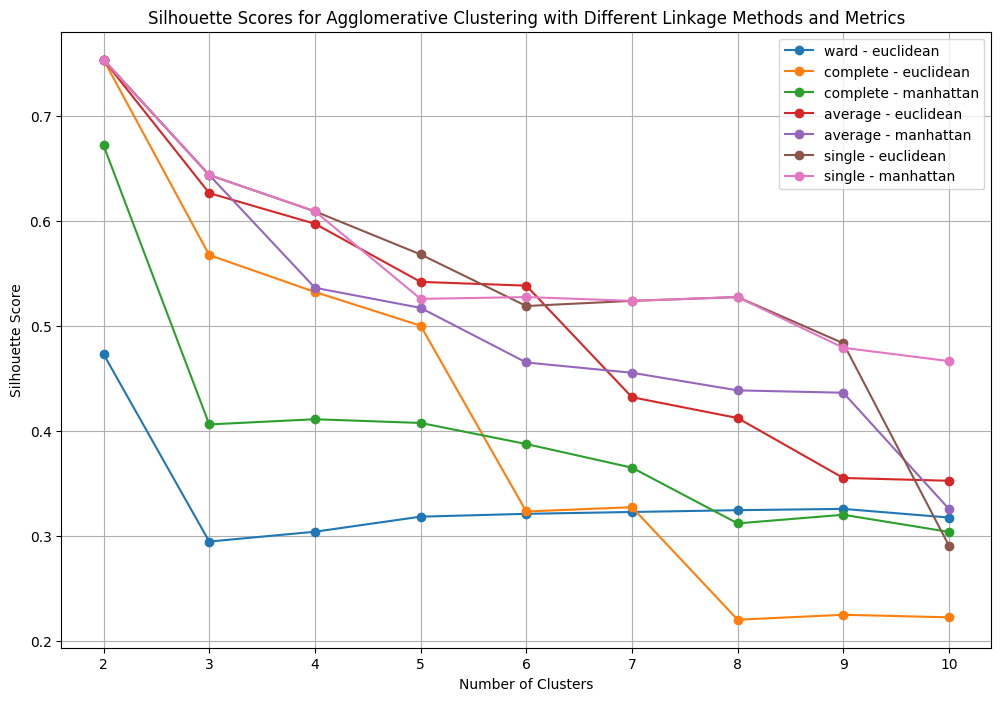

Best Silhouette Score: 0.7533138555676027
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [125]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

From the silhouette analysis plot, the **best combination of parameters** is achieved using the **complete linkage method** with the **Euclidean distance metric**, producing the **highest silhouette score of approximately 0.753** at **2 clusters**. This indicates that the dataset forms two well-defined and compact clusters under this configuration. A higher silhouette score signifies better separation and cohesion among clusters — meaning data points within each cluster are close to each other while being far from points in other clusters. Therefore, using complete linkage with Euclidean distance and setting the number of clusters to two provides the most distinct and meaningful grouping structure for this dataset.

## Hierarchical Clustering Modeling

In [126]:
# Hierarchical Clustering Model 1
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [127]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7533138555676027


In [128]:
# Hierarchical Clustering Model 2
aggloWard = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = aggloWard.fit_predict(df_scaled)

In [129]:
# Evaluation
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print(ss_ward)

0.47292973260268667


## Dendogram Visualization for Hierarchical Clustering Model

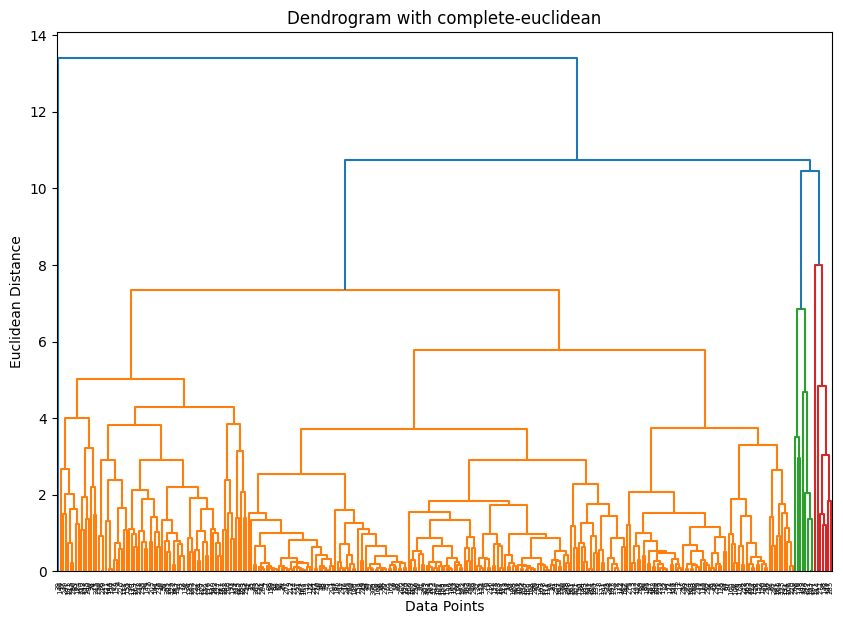

In [130]:
# Model 1: Best Combination Parameter
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

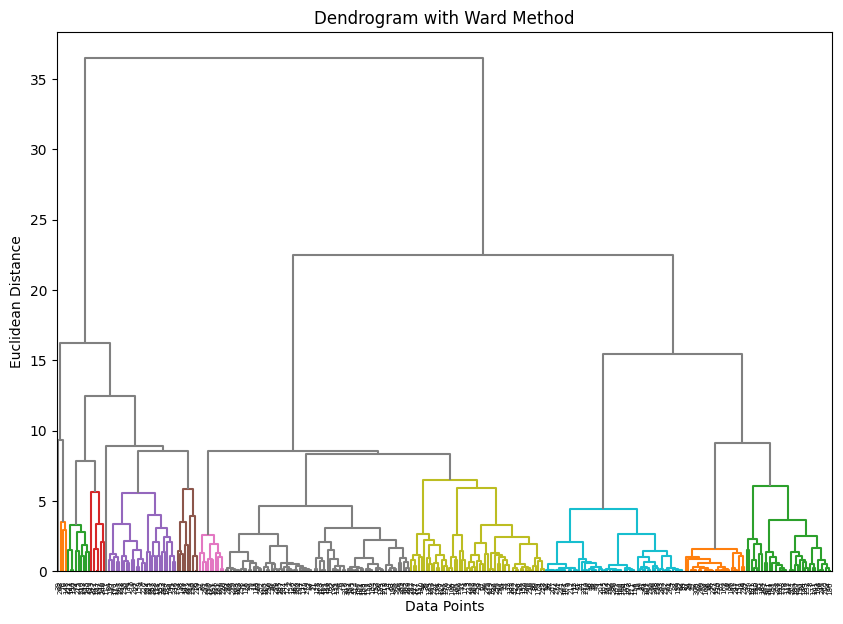

In [131]:
# Model 2: Ward Linkage
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

### Model 1

In [132]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1,0


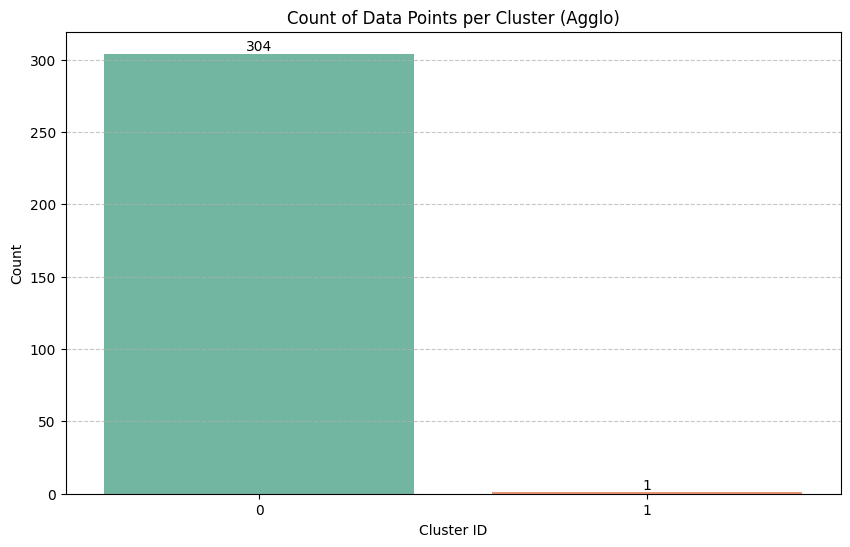

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Model 2

In [134]:
# Add the cluster labels to the original data
df['AggloWard'] = y_hc_ward

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo,AggloWard
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1,0,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,0,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1,0,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1,0,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1,0,1


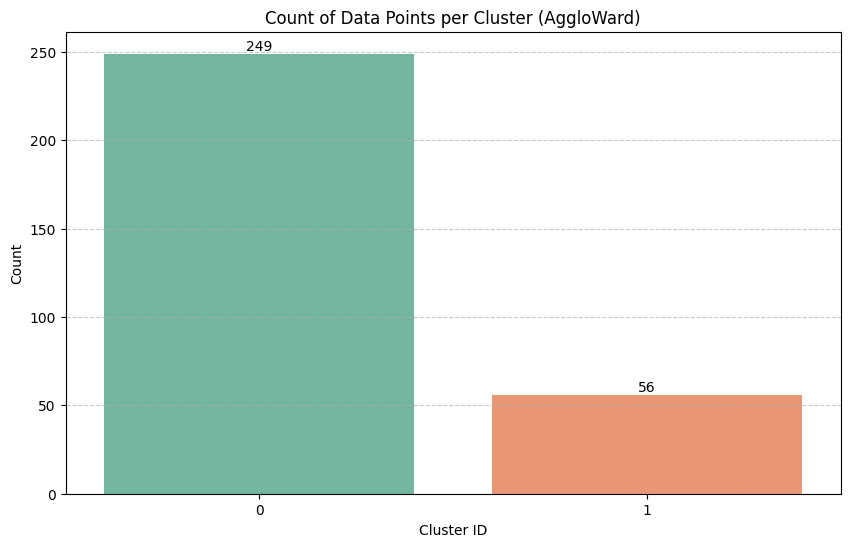

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'AggloWard' column of df
cluster_counts = df['AggloWard'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (AggloWard)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Statistical Summary for each cluster

In [142]:
# Model 1
# Group the data by cluster and calculate mean, median, and mode for each feature
cluster_summary = df.groupby(y_hc).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the 'first' column (used as mode) for categorical columns
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the final summary
cluster_summary.round(2)

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
Cluster                                                                      
0              11.0   304          226.49  162.5             265.79  200.0   
1              30.0     1          600.00  600.0             600.00  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
Cluster                                                                       
0               4.25    4.0               3.33    3.0           1.84    2.0   
1               7.00    7.0               5.00    5.0           1.00    1.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
Cluster                                                                        
0                   1   304                             1   304          2.0   
1                   1     1                             1     1          2.0   

              Arah Hadap Rumah        
        count             mode count  
Cluster                               
0         304              3.0   304  
1           1              0.0     1

The cluster summary for Model 1 (Agglomerative Complete Linkage) shows an extremely unbalanced segmentation, with Cluster 0 containing 304 properties and Cluster 1 containing only one property. Cluster 0 represents the majority of standard residential houses, characterized by moderate land and building sizes (average 226.49 m² and 265.79 m²), 4 bedrooms, 3 bathrooms, and typically 1–2 floors, indicating common middle-class homes in standard or premium areas. In contrast, Cluster 1 isolates a single outlier property with significantly larger dimensions (600 m² land and building area, 7 bedrooms, and 5 bathrooms), suggesting a high-end or unique house. This imbalance indicates that the model failed to form meaningful groups, as the complete linkage method treated one large property as an outlier, resulting in segmentation with little analytical or practical value.

In [143]:
# Model 2
# Group the data by cluster and calculate mean, median, and mode for each feature
cluster_summary = df.groupby(y_hc_ward).agg({
    'Nama Daerah': ['first', 'count'],
    'Luas Tanah (m2)': ['mean', 'median'],
    'Luas Bangunan (m2)': ['mean', 'median'],
    'Jumlah Kamar': ['mean', 'median'],
    'Jumlah Kamar Mandi': ['mean', 'median'],
    'Tingkat/Lantai': ['mean', 'median'],
    'Area Category': ['first', 'count'],
    'Lebar Jalan Depan Rumah (ROW)': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count']
})

# Rename the 'first' column (used as mode) for categorical columns
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

# Rename the cluster axis
cluster_summary = cluster_summary.rename_axis('Cluster')

# Display the final summary
cluster_summary.round(2)

Nama Daerah       Luas Tanah (m2)        Luas Bangunan (m2)         \
               mode count            mean median               mean median   
Cluster                                                                      
0              11.0   249          155.94  136.0             187.20  170.0   
1              48.0    56          546.88  464.5             621.21  600.0   

        Jumlah Kamar        Jumlah Kamar Mandi        Tingkat/Lantai         \
                mean median               mean median           mean median   
Cluster                                                                       
0               3.83    4.0               2.90    3.0           1.81    2.0   
1               6.18    6.0               5.25    5.0           1.98    2.0   

        Area Category       Lebar Jalan Depan Rumah (ROW)       Posisi Rumah  \
                 mode count                          mode count         mode   
Cluster                                                                        
0                   1   249                             1   249          2.0   
1                   2    56                             1    56          2.0   

              Arah Hadap Rumah        
        count             mode count  
Cluster                               
0         249              3.0   249  
1          56              0.0    56

The cluster summary for Model 2 (Ward linkage) shows a more balanced and meaningful segmentation, with Cluster 0 containing 249 properties and Cluster 1 containing 56 properties. Cluster 0 represents standard or mid-range houses characterized by smaller land and building sizes (average 155.94 m² and 187.20 m²), around 4 bedrooms, 3 bathrooms, and typically 1–2 floors—indicating typical family homes in standard residential areas. Meanwhile, Cluster 1 consists of larger and more luxurious properties, with average land and building areas of 546.88 m² and 621.21 m², approximately 6 bedrooms, and 5 bathrooms, representing high-end or premium houses. Both clusters share similar orientation and layout modes, but their size and room differences clearly distinguish affordability levels. This segmentation produced by the Ward method effectively captures the real-world distinction between average residential homes and premium properties, offering more balanced and interpretable market insights.

## Comparison & Interpretation

**Model 1 – Agglomerative Clustering (Complete–Euclidean)**

Cluster distribution:
*   Cluster 0 → 304 data points
*   Cluster 1 → 1 data point

Observation:
This result shows severe imbalance, with almost all data points falling into a single cluster. The one remaining data point is treated as an extreme outlier or noise.

Interpretation:
The algorithm with complete linkage focuses on the maximum distance between points across clusters. As a result, it tends to produce compact but imbalanced clusters, especially when one or more data points are far from the rest.
This indicates that the model fails to identify meaningful subgroups, instead treating one point as a separate cluster due to its distance.

Conclusion:
Although the silhouette score was high in testing, this score can be misleading when one cluster dominates. The segmentation lacks practical meaning because it does not separate distinct property types, only differentiating a single extreme case.



---
**Model 2 – Agglomerative Clustering (Ward Linkage)**

Cluster distribution:
*   Cluster 0 → 249 data points
*   Cluster 1 → 56 data points

Observation:
The distribution here is much more balanced, with both clusters containing a significant number of data points.

Effect on this dataset:
*   Cluster 0 likely represents standard or mid-range properties (moderate land/building area and average prices).
*   Cluster 1 likely captures larger or more luxurious properties, possibly in premium areas with higher land values.

The grouping aligns with real-world market segments — average vs high-end housing — rather than isolating anomalies.

Interpretation:
Ward’s method minimizes within-cluster variance, resulting in clusters that are more homogeneous internally while still distinct from each other.
The segmentation is therefore more meaningful and interpretable, likely capturing differences in property size, price, or area category.
The second cluster (smaller group of 56) may represent premium or high-value properties, while the larger cluster represents standard to below-average ones.

Conclusion:
Ward linkage forms compact and internally consistent clusters, where members share similar quantitative characteristics (size, price, rooms) and possibly qualitative ones (area category, road width).
The resulting clusters can be interpreted in business or real-estate terms, which makes them valuable for decision-making (e.g., pricing strategy, market targeting).


**Final Interpretation**

Ward linkage produces the most meaningful segmentation because it identifies two coherent and interpretable clusters that reflect real-world differences in the dataset, likely separating affordable or standard houses from premium or high-value properties. It maintains cluster compactness, avoids the distortion of outliers, and gives balanced, actionable results that can support property valuation, pricing strategy, or regional market insights.

In contrast, the complete linkage model fails to produce useful groupings, reducing the dataset to one massive cluster and one outlier, a segmentation that offers no analytical or business value.

Managerial Interpretation and Business Implications (Model 2 – Ward Linkage)

The clustering results from the Ward linkage model reveal two distinct and meaningful segments within the property market — Cluster 0: Standard Family Homes, and Cluster 1: Premium or Luxury Properties.

Cluster 0 (n=249) represents standard to mid-range family homes with moderate land and building sizes (around 155–187 m²), 3–4 bedrooms, and 1–2 floors. These properties cater to middle-income buyers who value functionality, accessibility, and affordability. From a managerial perspective, this segment offers high sales volume potential and forms the backbone of the mainstream housing market. Developers should focus on competitive pricing, location convenience, and value-for-money designs. Marketing campaigns can emphasize proximity to schools, transportation, and daily conveniences. Providing financing options or mortgage partnerships can further attract this price-sensitive segment.

Cluster 1 (n=56) consists of large, high-end properties with significantly higher land and building areas (around 547–621 m²), 6 bedrooms, and 5 bathrooms. This segment represents wealthy buyers or investors seeking exclusivity, comfort, and prestige. From a business standpoint, this cluster offers high-profit margins per unit and should be targeted through premium pricing, personalized sales approaches, and luxury branding. Developers can emphasize premium features such as gated communities, modern architecture, and private amenities. Exclusive events, high-end marketing channels, and strategic collaborations with luxury brands or banks can help attract this clientele.

In summary, the Ward linkage clustering highlights two profitable but contrasting strategies:

Cluster 0 (Standard Homes): Focus on volume sales, affordability, and functional appeal.

Cluster 1 (Luxury Homes): Focus on premium pricing, exclusivity, and high-value experiences.

By understanding these market distinctions, developers and property agents can tailor pricing strategies, product designs, and marketing efforts to effectively serve both the mass market segment and the premium niche, ensuring balanced growth and profitability across the housing portfolio.